# Basic classification: Classify images

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

2.2.0


In [4]:
train_dir = os.path.join(os.getcwd(), 'seg_train')
test_dir = os.path.join(os.getcwd(), 'seg_test')
pred_dir = os.path.join(os.getcwd(), 'seg_pred')


## Leitura 01

In [5]:
import cv2
from sklearn.utils import shuffle
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=42) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [6]:
Images, Labels = get_images(train_dir+'/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)
from random import randint


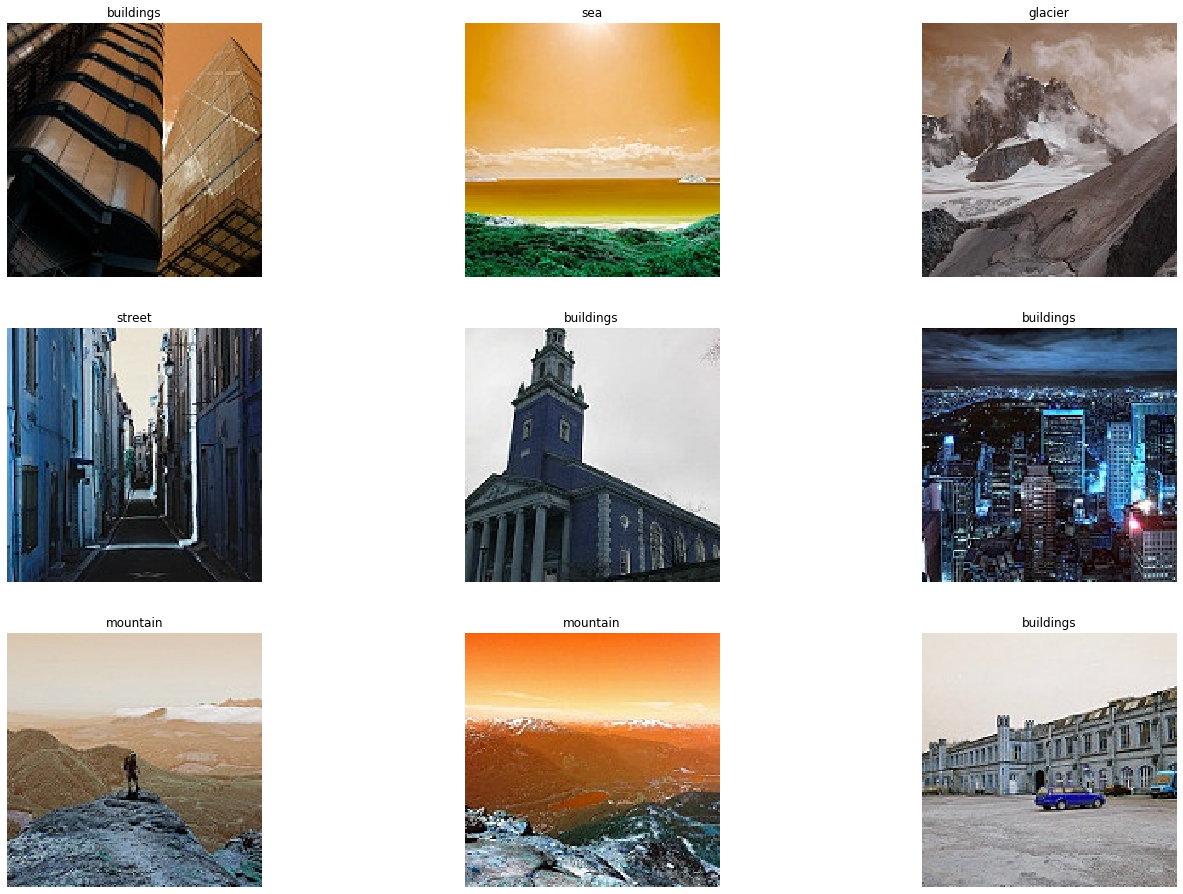

In [7]:
f,ax = plt.subplots(3,3) 
f.subplots_adjust(0,0,3,3)
for i in range(0,3,1):
    for j in range(0,3,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

## Modelo 01

In [8]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5)

In [9]:
from tensorflow.keras import layers as Layers
import tensorflow.keras.optimizers as Optimizer
from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, MaxPool2D, Activation

from tensorflow import keras

model = Sequential()

model.add(Conv2D(64, (3,3), strides=(1,1), input_shape=(150, 150 ,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(512, (3,3), strides=(1,1), input_shape=(48,48,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(512, (3,3), strides=(1,1), input_shape=(48,48,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(256, (3,3), strides=(1,1), input_shape=(48,48,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(6, activation='softmax' ))


model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.save_weights(checkpoint_path.format(epoch=0))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 512)       295424    
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 512)       2048      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 512)       0

In [10]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Epoch 1/35
307/307 [==============================] - 3862s 13s/step - loss: 1.3396 - accuracy: 0.5934 - val_loss: 1.4124 - val_accuracy: 0.6072
Epoch 2/35
307/307 [==============================] - 5000s 16s/step - loss: 0.7476 - accuracy: 0.7257 - val_loss: 1.1439 - val_accuracy: 0.6856
Epoch 3/35
307/307 [==============================] - 4750s 15s/step - loss: 0.6124 - accuracy: 0.7750 - val_loss: 1.2356 - val_accuracy: 0.6559
Epoch 4/35
307/307 [==============================] - 4516s 15s/step - loss: 0.5317 - accuracy: 0.8089 - val_loss: 0.9933 - val_accuracy: 0.7309
Epoch 5/35
307/307 [==============================] - 4193s 14s/step - loss: 0.4624 - accuracy: 0.8334 - val_loss: 2.1234 - val_accuracy: 0.5759
Epoch 6/35
307/307 [==============================] - 3782s 12s/step - loss: 0.3973 - accuracy: 0.8568 - val_loss: 0.9419 - val_accuracy: 0.7535
Epoch 7/35
307/307 [==============================] - 3375s 11s/step - loss: 0.3348 - accuracy: 0.8774 - val_loss: 1.5241 - val_ac

In [35]:
model.save('model_name.model')

INFO:tensorflow:Assets written to: model_name.model\assets


In [12]:
print(trained.history.keys())  

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


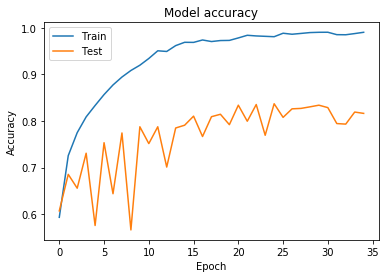

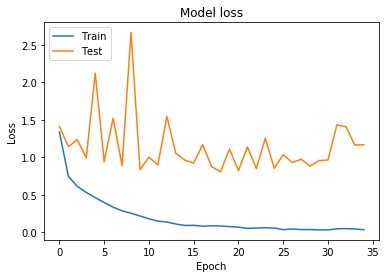

In [13]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
trained = tf.keras.models.load_model(os.getcwd())

In [14]:
test_images, test_labels = get_images(test_dir+'/') #Extract the training images from the folders.

test_images = np.array(test_images) #converting the list of images to numpy array.
test_labels = np.array(test_labels)

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

94/94 - 168s - loss: 1.1828 - accuracy: 0.8160

Test accuracy: 0.8159999847412109


In [16]:
class_names = ['Building' ,'forest','glacier','mountain','Sea' , 'Street']

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [19]:
predictions[0]

array([0.1295705 , 0.1295705 , 0.12957066, 0.35211167, 0.12960619,
       0.1295705 ], dtype=float32)

In [20]:
np.argmax(predictions[0])

3

In [21]:
test_labels[0]

3

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(6), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

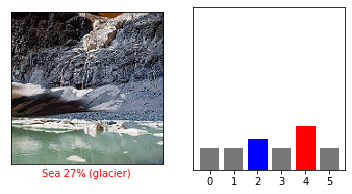

In [23]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

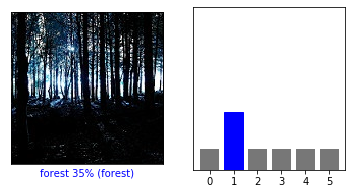

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

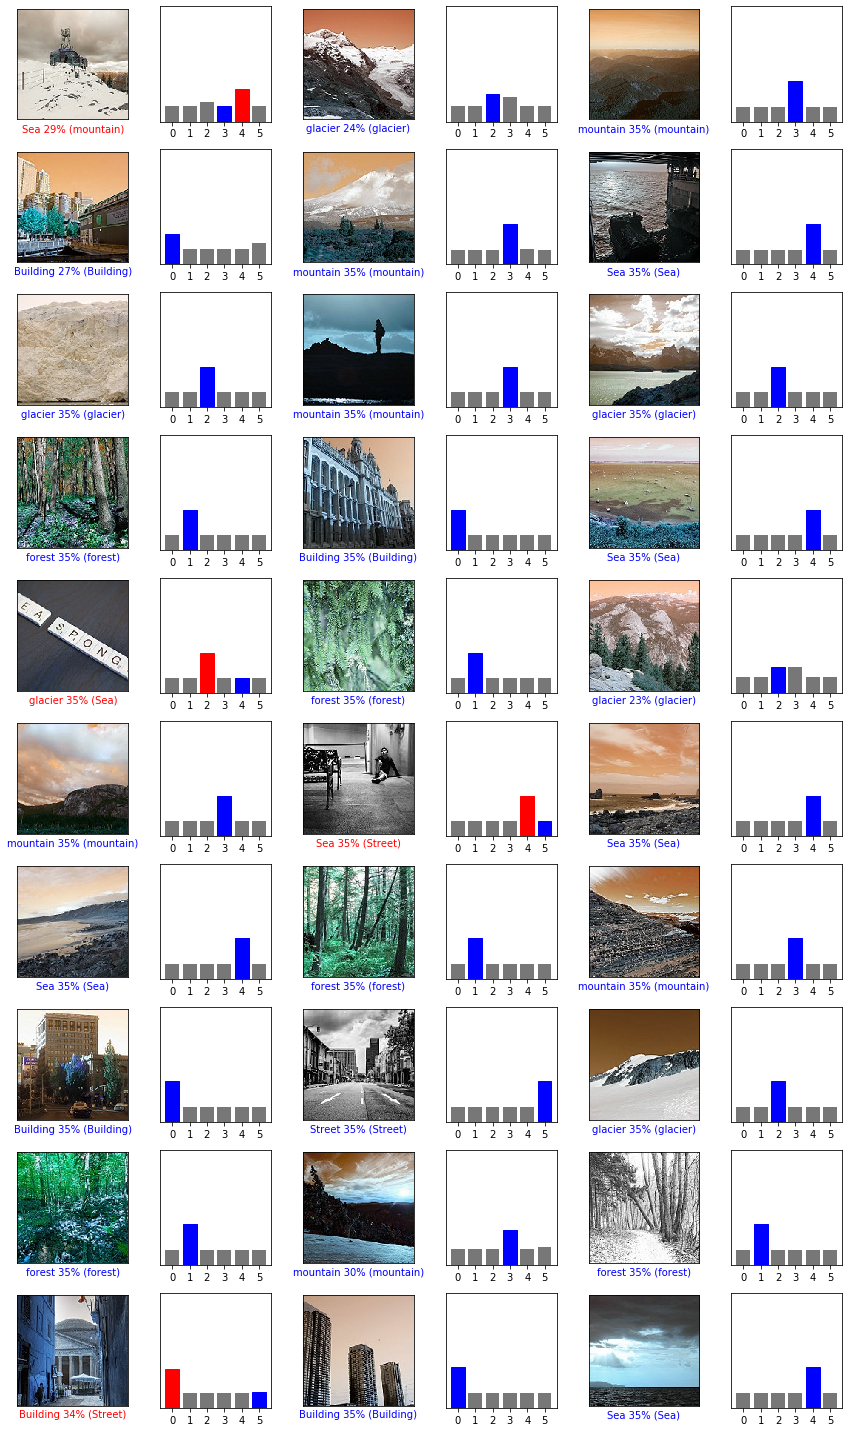

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    j = randint(0,len(test_labels))
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(j, predictions[j], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(j, predictions[j], test_labels)
plt.tight_layout()
plt.show()

In [26]:
def plot_image_no_class(i, predictions_array, img):
    predictions_array, img = predictions_array, img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    #if predicted_label == true_label:
    color = 'blue'
    #else:
       # color = 'red'

    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
                                    100*np.max(predictions_array)),
                                    color=color)

def plot_value_array_no_class(i, predictions_array):
    predictions_array = predictions_array
    plt.grid(False)
    plt.xticks(range(6))
    plt.yticks([])
    thisplot = plt.bar(range(6), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')


In [27]:
import cv2
from sklearn.utils import shuffle
def get_images_no_call(directory):
    Images = []    
    for image_file in os.listdir(directory): #Extracting the file name of the image from Class Label folder
        image = cv2.imread(directory+r'/'+image_file) #Reading the image (OpenCV)
        image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
        Images.append(image)
        #Labels.append(label)
    
    return shuffle(Images,random_state=42) #Shuffle the dataset you just prepared.


In [28]:
print(pred_dir)

C:\Users\Venicius Ferreira\OneDrive\Quarentena\Github\Desafio 04\kaggle-intel\seg_pred


In [30]:
Images= get_images_no_call(pred_dir+'/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.

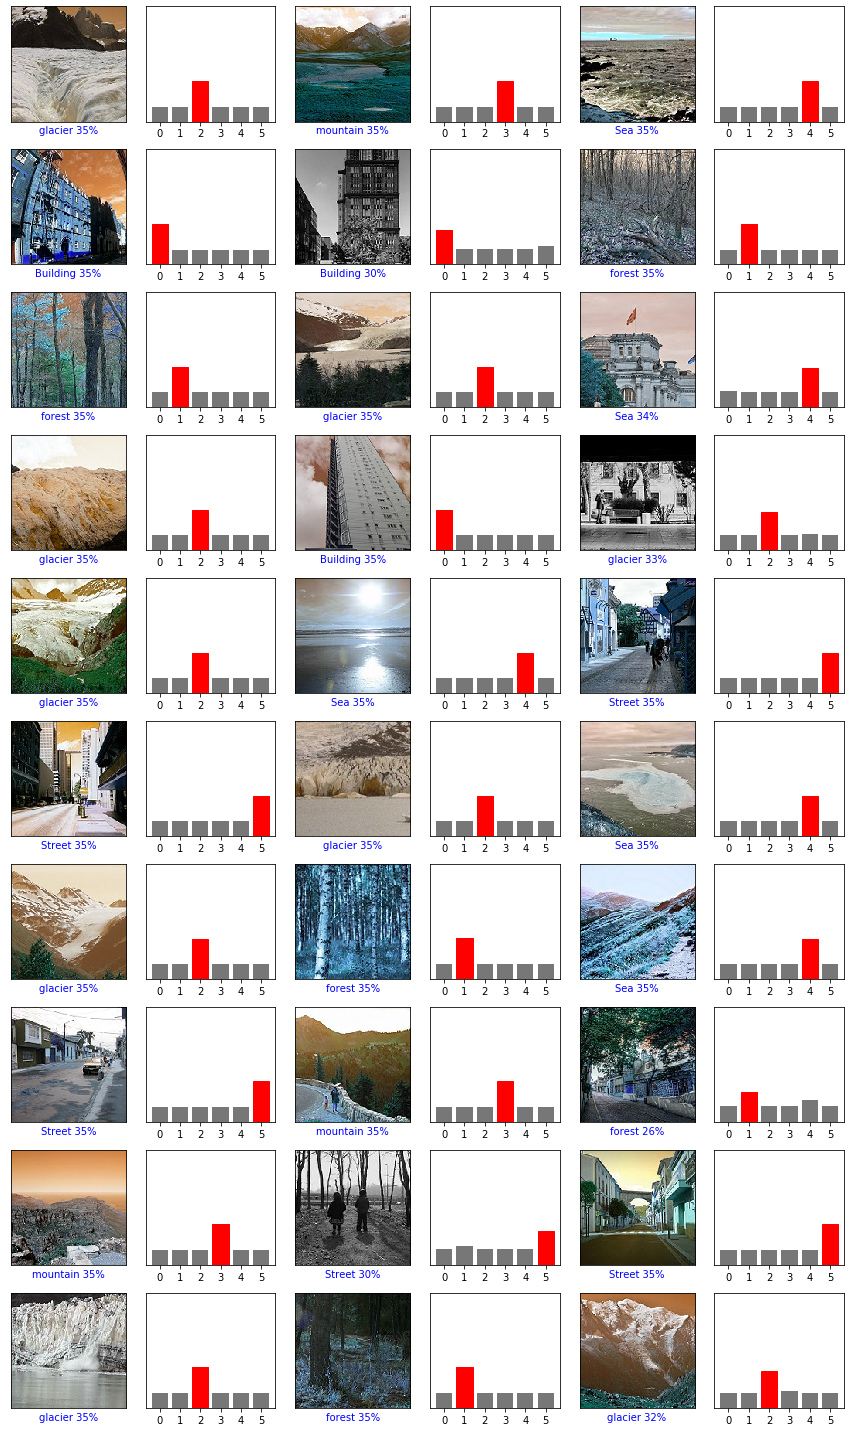

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    j = randint(0,len(test_labels))
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image_no_class(j, predictions[j], test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array_no_class(j, predictions[j])
plt.tight_layout()
plt.show()